In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('data_for_models.csv', index_col=0)
pd.set_option('display.max_columns', None)

In [3]:
df

,order_code,display_name,qty_items_sold_item_1,sap_main_size_item_1,product_navision_detail_category_item_1,weight_item_1,volume_item_1,label_item_1,height_item_1,qty_items_sold_item_2,sap_main_size_item_2,product_navision_detail_category_item_2,weight_item_2,volume_item_2,label_item_2,height_item_2,qty_items_sold_item_3,sap_main_size_item_3,product_navision_detail_category_item_3,weight_item_3,volume_item_3,label_item_3,height_item_3,qty_items_sold_item_4,sap_main_size_item_4,product_navision_detail_category_item_4,weight_item_4,volume_item_4,label_item_4,height_item_4,qty_items_sold_item_5,sap_main_size_item_5,product_navision_detail_category_item_5,weight_item_5,volume_item_5,label_item_5,height_item_5,qty_items_sold_item_6,sap_main_size_item_6,product_navision_detail_category_item_6,weight_item_6,volume_item_6,label_item_6,height_item_6,qty_items_sold_item_7,sap_main_size_item_7,product_navision_detail_category_item_7,weight_item_7,volume_item_7,label_item_7,height_item_7,qty_items_sold_item_8,sap_main_size_item_8,product_navision_detail_category_item_8,weight_item_8,volume_item_8,label_item_8,height_item_8,qty_items_sold_item_9,sap_main_size_item_9,product_navision_detail_category_item_9,weight_item_9,volume_item_9,label_item_9,height_item_9,qty_items_sold_item_10,sap_main_size_item_10,product_navision_detail_category_item_10,weight_item_10,volume_item_10,label_item_10,height_item_10,qty_items_sold_item_11,sap_main_size_item_11,product_navision_detail_category_item_11,weight_item_11,volume_item_11,label_item_11,height_item_11,qty_items_sold_item_12,sap_main_size_item_12,product_navision_detail_category_item_12,weight_item_12,volume_item_12,label_item_12,height_item_12,qty_items_sold_item_13,sap_main_size_item_13,product_navision_detail_category_item_13,weight_item_13,volume_item_13,label_item_13,height_item_13,qty_items_sold_item_14,sap_main_size_item_14,product_navision_detail_category_item_14,weight_item_14,volume_item_14,label_item_14,height_item_14,qty_items_sold_item_15,sap_main_size_item_15,product_navision_detail_category_item_15,weight_item_15,volume_item_15,label_item_15,height_item_15
0,2114228695,BS 2,1,XL,fahrradtrikot,363.03,4412.500000,True,914.0,1.0,42,business hemd l.a uni,488.01,1410.240894,True,914.0,1.0,42,business hemd l.a uni,488.01,1410.240894,True,914.0,1.0,XXL,t-shirt multipack,552.28,1665.455381,True,914.0,1.0,XXL,t-shirt multipack,552.28,1665.455381,True,914.0,1.0,43,business hemd l.a gemust.,476.44,1962.252333,True,914.0,1.0,43,business hemd l.a uni,488.01,1410.240894,True,914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2114231111,BS 1,1,S,trainingshose lang,543.41,1467.770317,True,914.0,1.0,38,kleid,516.74,1026.861070,True,914.0,1.0,M,top,401.20,776.287085,True,914.0,1.0,M,poloshirt 1/2,433.69,4412.500000,True,914.0,1.0,M,top,401.20,776.287085,True,914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2114233362,Klein,1,S,badeanzug,396.39,1191.740467,True,914.0,1.0,S,badeanzug,396.39,1191.740467,True,914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2114237231,BS 2,1,152,badeshort,343.06,4412.500000,True,914.0,1.0,152,badeshort,343.06,4412.500000,True,914.0,1.0,W29,jeans,649.92,1004.282603,True,914.0,1.0,S,pullunder,492.31,3279.107143,True,914.0,1.0,140/146,badeshort,3

In [4]:
# Prepare features and target values, converting non-numeric data to numeric and filling missing values
X = df.drop(columns=['display_name']).apply(pd.to_numeric, errors='coerce').fillna(0).values
y = df['display_name'].values

# Encode target labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
# Split data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [6]:
# Initialize the CatBoost classifier with hyperparameters and GPU support
model = CatBoostClassifier(
    iterations=1300,
    learning_rate=0.4,
    depth=4,
    l2_leaf_reg=2,
    loss_function='MultiClass',
    verbose=100,
    random_seed=42,
    task_type='GPU'
)

# Train the model and evaluate on the test set
model.fit(X_train, y_train, eval_set=(X_test, y_test))

CatBoostError: C:/Go_Agent/pipelines/BuildMaster/catboost.git/catboost/cuda/cuda_lib/cuda_base.h:281: CUDA error 35: CUDA driver version is insufficient for CUDA runtime version

In [ ]:
# Predict class labels on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.flatten() if len(y_pred.shape) > 1 else y_pred

In [ ]:
# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

CatBoostError: C:/Go_Agent/pipelines/BuildMaster/catboost.git/catboost/cuda/cuda_lib/cuda_base.h:281: CUDA error 35: CUDA driver version is insufficient for CUDA runtime version

In [33]:
# Get feature importances from the trained model using the training data
feature_importances = model.get_feature_importance(data=Pool(X_train, y_train))

# Extract feature names from the DataFrame, excluding the target column
feature_names = df.drop(columns=['display_name']).columns

# Create a DataFrame to pair feature names with their corresponding importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

In [34]:
importance_df.head(20)

,Feature,Importance
4,weight_item_1,19.866878
5,volume_item_1,12.611933
11,weight_item_2,11.196718
0,order_code,10.233425
18,weight_item_3,6.134248
12,volume_item_2,5.449689
2,sap_main_size_item_1,5.177102
25,weight_item_4,3.459410
15,qty_items_sold_item_3,3.245132
19,volume_item_3,3.098471


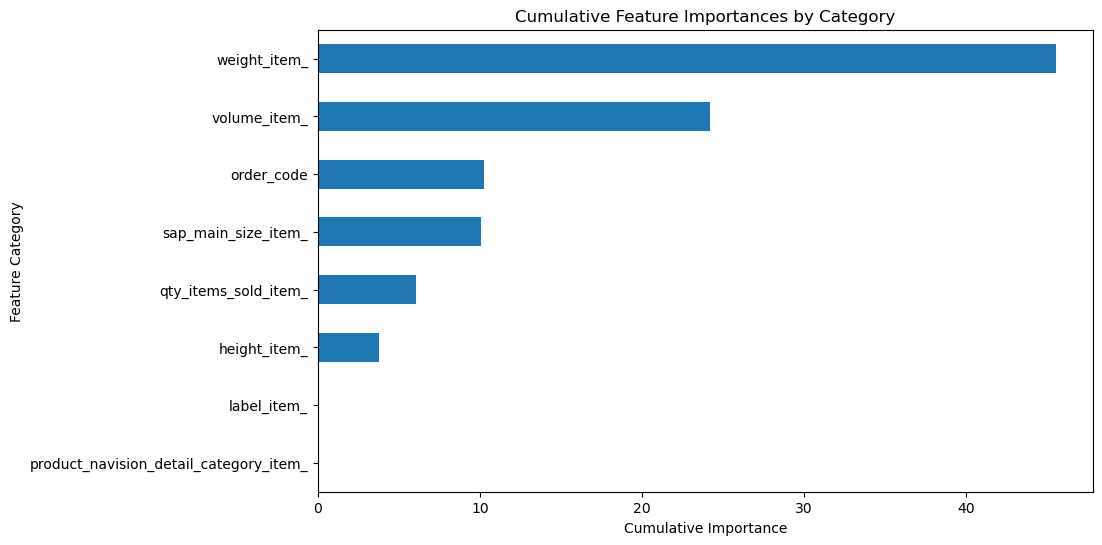

In [35]:
# Extract the category part of each feature name and add it as a new column
importance_df['Category'] = importance_df['Feature'].str.extract(r'([a-zA-Z_]+)')

# Calculate the cumulative importance for each feature category
category_importances = importance_df.groupby('Category')['Importance'].sum().sort_values(ascending=False)

# Plot the cumulative feature importances by category as a horizontal bar chart
plt.figure(figsize=(10, 6))
category_importances.plot(kind='barh')
plt.xlabel('Cumulative Importance')
plt.ylabel('Feature Category')
plt.title('Cumulative Feature Importances by Category')
plt.gca().invert_yaxis()  # Reverse the order for better visualization
plt.show()